In [587]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [588]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [589]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [590]:
df.loc[df['v1']=='spam']['v2'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [591]:
df.shape

(5572, 5)

# Steps to be followed:
1) Data cleaning
2) EDA
3) Text preprocessing
4) Model Building
5) Evaluation
6) Improvement
7) Website
8) Deployment


# 1) Data Cleaning
handle NA values, remove duplicates

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [593]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [594]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [595]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [596]:
df.rename(columns={"v1":'target',"v2":"text"},inplace=True)

In [597]:
label_encoder=preprocessing.LabelEncoder()

In [598]:
df['target']=label_encoder.fit_transform(df['target'])

In [599]:
df.sample(5)

,target,text
394,0,Pick you up bout 7.30ish? What time are and t...
2114,1,Sunshine Hols. To claim ur med holiday send a ...
5014,0,I think the other two still need to get cash b...
2651,0,"Text me when you get off, don't call, my phone..."
648,0,No prob. I will send to your email.


Check for missing values

In [600]:
df.isnull().sum()

target    0
text      0
dtype: int64

Check for duplicate values

In [601]:
df.duplicated().sum()

403

Remove duplicate values

In [602]:
df=df.drop_duplicates(keep="first")

In [603]:
df.duplicated().sum()

0

In [604]:
df.shape

(5169, 2)

# EDA 

In [605]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

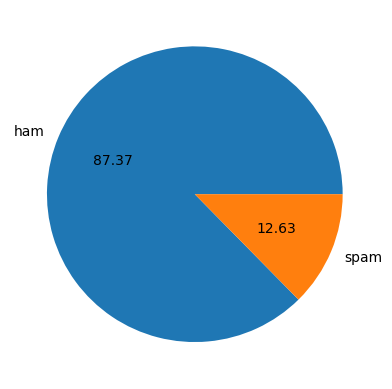

In [606]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

Highly imbalanced dataset

In [607]:
import nltk

In [608]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/namratavairagkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [609]:
df['num_characters']=df['text'].apply(len)

/var/folders/tb/866dp3qd26x68yp_6sd1rvrm0000gn/T/ipykernel_41088/399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [610]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [611]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/tb/866dp3qd26x68yp_6sd1rvrm0000gn/T/ipykernel_41088/1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [612]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [613]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/tb/866dp3qd26x68yp_6sd1rvrm0000gn/T/ipykernel_41088/754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [614]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [615]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [616]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [617]:
# ham
df[df["target"]==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [618]:
# spam
df[df["target"]==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [619]:
import seaborn as sns

<Axes: xlabel='target', ylabel='num_characters'>

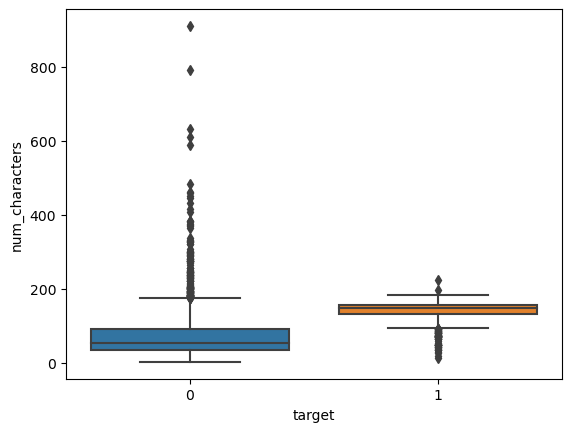

In [620]:
sns.boxplot(data=df,x=df['target'],y=df['num_characters'])

<Axes: xlabel='target', ylabel='num_words'>

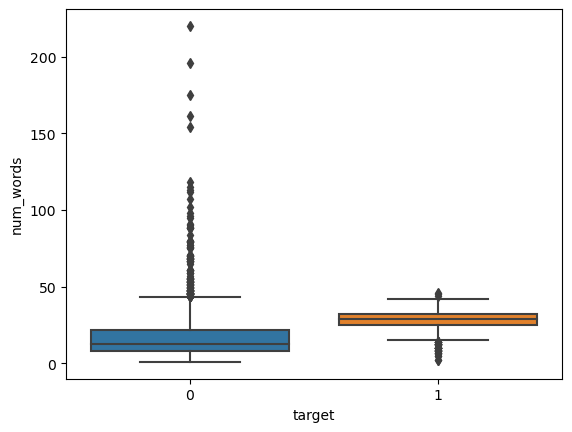

In [621]:
sns.boxplot(data=df,x=df['target'],y=df['num_words'])

<Axes: xlabel='target', ylabel='num_sentences'>

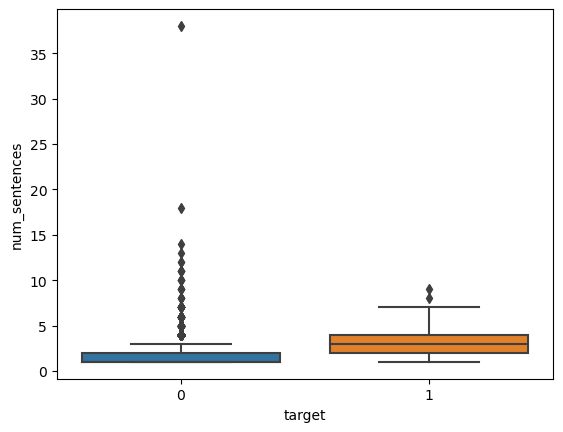

In [622]:
sns.boxplot(data=df,x=df['target'],y=df['num_sentences'])

# 2) Data preprocessing
 lower case, remove stop words and punctuations,stemming,remove special characters

In [623]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/namratavairagkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [624]:
from nltk.corpus import stopwords
stopwordsList=stopwords.words("english")


In [625]:
import string

In [626]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [627]:
def tranform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    alphaNumeric=[]
    for i in text:
        if i.isalnum():
            alphaNumeric.append(i)
    
    text=alphaNumeric[:]
    alphaNumeric.clear()
    for i in text:
        if i not in stopwordsList and i not in string.punctuation:     
            alphaNumeric.append(i)
    
    text=alphaNumeric[:]
    alphaNumeric.clear()
    
    for i in text:  
            alphaNumeric.append(ps.stem(i) )
            
    return " ".join(alphaNumeric)        

In [628]:
text="Hi i am  Namrata. This is year 2024!"
text=tranform_text(text)
print(text)

hi namrata year 2024


In [629]:
df['transformed_text']=df['text'].apply(tranform_text)

/var/folders/tb/866dp3qd26x68yp_6sd1rvrm0000gn/T/ipykernel_41088/1730057144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(tranform_text)


In [630]:
df.shape

(5169, 6)

In [631]:
import sys
print(sys.executable)


/Users/namratavairagkar/anaconda3/bin/python


In [632]:
from wordcloud import WordCloud

In [633]:
wc=WordCloud(width=800, height=400,background_color='black')

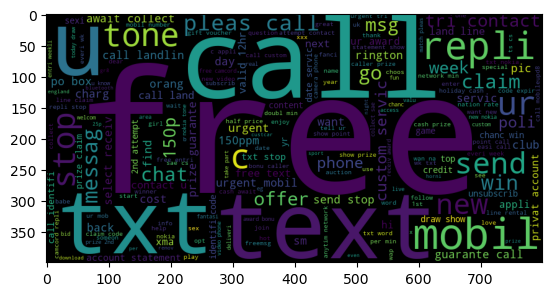

In [634]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

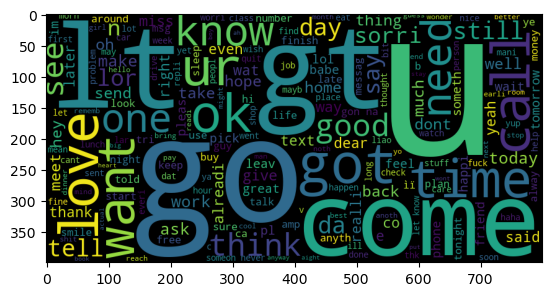

In [635]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

# Model Building

# Bag of words

In [636]:
cv=CountVectorizer()

In [637]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [638]:
df1 = pd.DataFrame(X)  

In [639]:
df1.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [640]:
new_df = pd.concat([df1, df], axis = 1)

In [641]:
new_df.shape

(5169, 6714)

In [642]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6704,6705,6706,6707,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [643]:
y=new_df['target']

In [644]:
X=new_df.drop(columns=['text','transformed_text','target'])
X.columns = X.columns.astype(str)

In [645]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [646]:
from sklearn.model_selection import train_test_split

In [647]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [648]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score

In [649]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [650]:
gnb.fit(X_train,y_train)
y_pred_gnb_BOW=gnb.predict(x_test)

In [651]:
print(confusion_matrix(y_test,y_pred_gnb_BOW))
print(precision_score(y_test,y_pred_gnb_BOW))

[[792 104]
 [ 20 118]]
0.5315315315315315


In [652]:
mnb.fit(X_train,y_train)
y_pred_mnb_BOW=mnb.predict(x_test)

In [653]:
print(confusion_matrix(y_test,y_pred_mnb_BOW))
print(precision_score(y_test,y_pred_mnb_BOW))

[[881  15]
 [ 19 119]]
0.8880597014925373


In [654]:
bnb.fit(X_train,y_train)
y_pred_bnb_BOW=bnb.predict(x_test)

In [655]:
print(confusion_matrix(y_test,y_pred_bnb_BOW))
print(precision_score(y_test,y_pred_bnb_BOW))

[[893   3]
 [ 28 110]]
0.9734513274336283


# Tf idf

In [656]:
tfidf=TfidfVectorizer()

In [657]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [658]:
df1 = pd.DataFrame(X)  

In [659]:
df1.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [660]:
new_df = pd.concat([df1, df], axis = 1)

In [661]:
y=new_df['target']

In [662]:
X=new_df.drop(columns=['text','transformed_text','target'])
X.columns = X.columns.astype(str)

In [663]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [664]:
gnb.fit(X_train,y_train)
y_pred_gnb_tfidf =mnb.predict(x_test)

In [665]:
print(confusion_matrix(y_test,y_pred_gnb_tfidf))
print(precision_score(y_test,y_pred_gnb_tfidf))

[[896   0]
 [129   9]]
1.0


In [666]:
mnb.fit(X_train,y_train)
y_pred_mnb_tfidf=mnb.predict(x_test)

In [667]:
print(confusion_matrix(y_test,y_pred_mnb_tfidf))
print(precision_score(y_test,y_pred_mnb_tfidf))

[[896   0]
 [136   2]]
1.0


In [668]:
bnb.fit(X_train,y_train)
y_pred_bnb_tfidf=bnb.predict(x_test)

In [669]:
print(confusion_matrix(y_test,y_pred_bnb_tfidf))
print(precision_score(y_test,y_pred_bnb_tfidf))

[[893   3]
 [ 28 110]]
0.9734513274336283


The best classifier is bnb with tfidf vectorizer. Because the precision is 97% and type errors are less compare to other models